In [3]:
# melakukan import libray
import matplotlib.pyplot as plt # berfungsi untuk membuat visualisasi data seperti grafik bar
import numpy as np # berfungsi untuk membuat objek N-dimensi aray 
import cv2 as cv # berfungsi untuk mengkonversi gambar ke dalam gray
import math # berfungsi untuk mempermudah dalam melakukan perhitungan matematis seperti sin, cos

(256, 256)

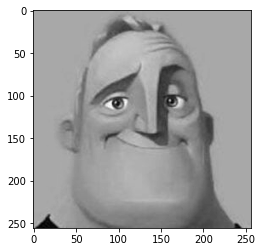

In [4]:
image = plt.imread('img/inc.jpg') # melalkukan import dengan library matplotlib yang disimpan dalam image
gbr = cv.cvtColor(image, cv.COLOR_BGR2GRAY) # mengkonversi citra gambar image ke dalam gray atau abu-abu dengan bantuan library cv2
plt.imshow(gbr, cmap='gray') # menampilkan citra yang sudah dikonversi sebelumnya dengan color mapping gray 
gbr.shape # menampilkan ukuran pixel dari citra gbr 

# 1. TRANSLASI

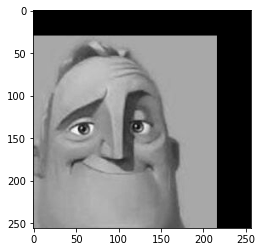

In [5]:
trans = np.zeros(gbr.shape) # membuat array yang berisi nilai 0 dengan ukuran dari citra gbr
def translation(image, result, x, y): # inisialisasi fungsi tranlation dengan parameter image, result, x, y
    for i in range(image.shape[1]): # perulangan dalam variabel i dengan batasan nilai horizontal dari citra parameter image
        for j in range(image.shape[0]): # perulangan dalam variabel j dengan batasan nilai vertikal dari citra parameter image
            xBaru = i - x # variabel xBaru yang berisi nilai dari pengurangan nilai i dan parameter x
            yBaru = j - y # variabel yBaru yang berisi nilai dari pengurangan nilai j dan parameter y
            if(xBaru >= image.shape[0] or yBaru >= image.shape[1] or xBaru <0 or yBaru < 0):
            # sebuah kondisi yang dimana jika kondisi ini terpenuhi maka akan menjalankan perintah selanjutnya
                result[j, i] = 0
            else:
            # kondisi lain jika kondisi sebelumnya tidak terpenuhi
                result[j, i] = image[yBaru][xBaru]

    plt.figure(facecolor='white')
    plt.imshow(result, cmap='gray') 
    # menampilkan citra yang sudah diproses dalam paramter result dengan library plt dan color mapping gray  

translation(gbr, trans, -40, 30) # memanggil fungsi tralation beserta paramter yang akan digunakan

# 2. ROTASI

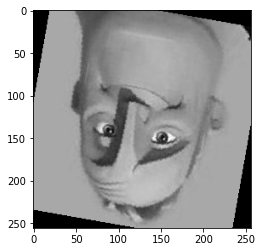

In [6]:
def rotate (img, degree):
    # set center gambar dimana
    # itung rumus, menggunakan center baru jadi x dan y akan dikurangi dengan koordinat center
    # balik lagi centernya ke 0 0 awal
    # petakan ke array baru;

    rotation_amount_degree = degree

    rotation_amount_rad = rotation_amount_degree * np.pi / 180.0
    height, width = img.shape

    rotated_image = np.zeros(img.shape)
    rotated_height, rotated_width= rotated_image.shape

    mid_row = int( (rotated_height-1)/2 )
    mid_col = int( (rotated_width-1)/2 )

    for r in range(rotated_height):
        for c in range(rotated_width):
            y = (r-mid_col)*math.cos(rotation_amount_rad) + (c-mid_row)*math.sin(rotation_amount_rad)
            x = -(r-mid_col)*math.sin(rotation_amount_rad) + (c-mid_row)*math.cos(rotation_amount_rad)

            # newY = cos(angle)*y + sin(angle)*x
            # newX = - sin(angle)*y + cos(angle)*x 

            y += mid_col
            x += mid_row

            x = round(x)
            y = round(y)

            if (x >= 0 and y >= 0 and x < width and y < height):
                rotated_image[r][c] = img[y][x]

    # return rotated_image
    plt.figure(facecolor='white')
    plt.imshow(rotated_image, cmap='gray')
    
# rotated = rotate (gbr,170)
# plt.imshow(rotated, cmap ="gray")
rotate(gbr, 170)

<!-- 3. PENCERMINAN -->

# 3 PENCERMINAN TERHADAP SUMBU X dan Y

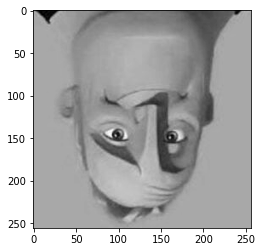

In [7]:
def flipX (image): # terhadap sumbu x
# inisilisasi fungsi flipX dengan parameter image 
    mirror = np.zeros(image.shape) # membuat array yang bernilai 0 dengan ukuran citra gbr dengan nama variabel mirror
    for i in range (image.shape[0]): # perulangan dalam variabel i dengan batasan nilai vertikal dari citra parameter image
        for j  in range(image.shape[1]): # perulangan dalam variabel j dengan batasan nilai horizontal dari citra parameter image
            mirror [i, j] = image[image.shape[1]-1-i, j]
            # variabel mirror dengan index i, j akan berisi nilai sesuai indek array pada parameter image dengan indeks 
            # nilai ukuran horizontal parameter image yang sudah dioperasikan dan j
    plt.figure(facecolor='white')
    plt.imshow(mirror, cmap='gray') # menampilkan citra pada variabell mirror dengan color mapping gray

flipX(gbr) # memanggil fungsi flipX dengan nilai pada variabel gbr

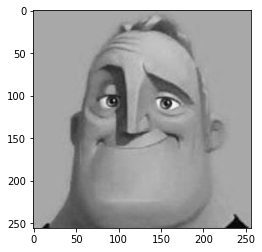

In [8]:
def flipY (image): # terhadap sumbu y
# inisilisasi fungsi flipY dengan parameter image 
    mirror = np.zeros(image.shape) # membuat array yang bernilai 0 dengan ukuran citra gbr dengan nama variabel mirror
    for i in range (image.shape[0]): # perulangan dalam variabel i dengan batasan nilai vertikal dari citra parameter image
        for j  in range(image.shape[1]): # perulangan dalam variabel j dengan batasan nilai horizontal dari citra parameter image
            mirror [i, j] = image[i, image.shape[0]-1-j]
            # variabel mirror dengan index i, j akan berisi nilai sesuai indek array pada parameter image dengan indeks 
            # i dan nilai ukuran horizontal parameter image yang sudah dioperasikan
    plt.figure(facecolor='white')
    plt.imshow(mirror, cmap='gray') # # menampilkan citra pada variabell mirror dengan color mapping gray

flipY(gbr) # memanggil fungsi flipY dengan nilai pada variabel gbr

# 4. DILATASI

In [9]:
def dilate (image, skalar): # inisialisasi fungsi dilate dengan parameter image dan skalar
    heightNew = math.floor(image.shape[0] * skalar) 
    # variabel heightNew berisi nilai hasil operasi dari nilai ukuran vertikal parameter image dengan parameter skalar 
    weightNew = math.floor(image.shape[1] * skalar)
    # variabel weightNew berisi nilai hasil operasi dari nilai ukuran vertikal parameter image dengan parameter skalar

    result = np.zeros([heightNew, weightNew]) # membuat array kosong dengan ukuran dari nilai variabel heightNew dan weightNew

    for i in range (heightNew): # perulangan dengan batasan nilai yang terdapat pada variabel heightNew
        for j in range (weightNew): # perulangan dengan batasan nilai yang terdapat pada variabel weightNew
            xBefore = int(image.shape[0] * i / heightNew) 
            yBefore = int(image.shape[1] * j / weightNew)
            result [i, j] = image[xBefore, yBefore] # pixel pada result berisi nilai pixel pada parameter image
    
    plt.figure(facecolor='white')
    plt.imshow(result, cmap='gray') #  menampilkan hasil citra pada variabel result dengan color mapping gray


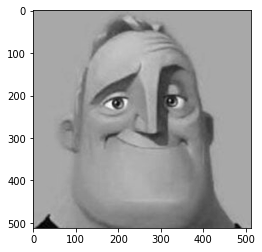

In [10]:
dilate(gbr, 2) # memanggil fungsi dilate dengan citra yang tersimpan pada gbr dengan skalar 2

# 5. OPERASI CITRA

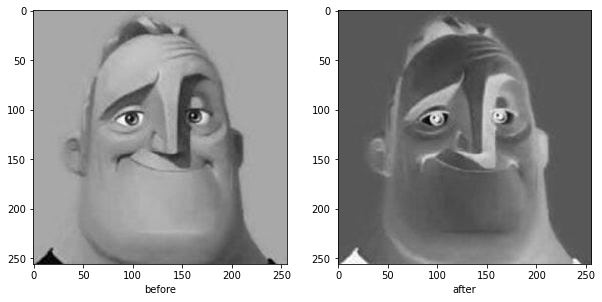

In [11]:
citraNegatif = np.zeros(gbr.shape) # membuat suatu array yang bernilai 0 dengan ukuran yang sama dari ukuran citra gbr
# fig = plt.figure(facecolor='white', figsize=[10, 5])
def operasiCitra (image, result): # inisialisasi fungsi operasiCitra dengan parameter image dan result
    for i in range(image.shape[0]): # perulangan dalam variabel i dengan batasan nilai vertikal dari citra parameter image
        for j in range (image.shape[1]): # perulangan dalam variabel j dengan batasan nilai horizontal dari citra parameter image
            result[i,j] = 255 - image[i, j] # parameter result berisi nilai dari operasi 255 - pixel dari citra parameter image
    
    plt.figure(facecolor='white', figsize=[10, 5])
    plt.subplot(121)
    plt.imshow(image, cmap='gray') # menampilkan citra pada parameter image
    plt.xlabel("before")
    plt.subplot(122)
    plt.imshow(result, cmap='gray') # menampilkan hasil citra pada parameter result
    plt.xlabel("after")
    
operasiCitra(gbr, citraNegatif) # memanggil fungsi operasiCitra dengan citra yang berada pada gbr dan citraNegatif

In [17]:
def barHistogram(image): # membuat function barHistogram untuk membuat histogram pada suatu gambar dengan parameter image
    result = np.zeros(image.shape[0]) # membuat satu array yang masih bernilai 0 dengan ukuran vertikal dari parameter image   
    for i in range (image.shape[0]): # perulangan dalam variabel i dengan batasan nilai vertikal dari citra parameter image
        for j in range (image.shape[1]): # perulangan dalam variabel j dengan batasan nilai horizontal dari citra parameter image
            v = int(image[i, j]) # inisialisasi variabel val yang berisi nilai pada pixel parameter image
            result [v] += 1  # memberi nilai pada setiap elemen pixel yang melalui perulangan
    
    g = [i for i in range (image.shape[0])] # inisialisasi variabel g dengan nilai perulangan dengan batasan ukuran vertikal parameter image
    plt.bar(g, result) # menampilkan grafik pada nilai g pada sumbu y dan result pada sumbu x
    

<ipython-input-18-2deeff615434>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(111)


Text(0.5, 0, 'Perbandingan Histogram Gray dan Citra Negatif')

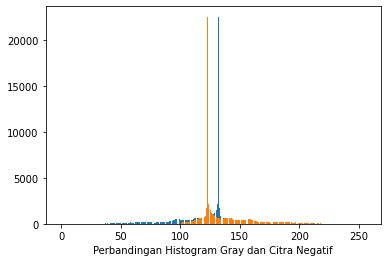

In [18]:
plt.figure(facecolor='white')
plt.subplot(111)
barHistogram(gbr) # memanggil fungsi barHistogram dengan gambar yang berada pada variabel gbr
plt.subplot(111)
barHistogram(citraNegatif) # memanggil fungsi barHistogram dengan gambar yang berada pada variabel citraNegatif 
plt.xlabel("Perbandingan Histogram Gray dan Citra Negatif") # memberi label pada bar pada posisi horizontal